<a href="https://colab.research.google.com/github/primeomkar/Netflix-Movies-and-Tv-shows-Clustering-by-Omkar/blob/main/Netflix_Movies_and_Tv_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **student name**    - Omkar K. Terkar

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
My Task is to make a Model that can cluster similar type of content together.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(df.columns)
rows = df.shape[0]
columns = df.shape[1]
print (f'The rows are {rows} and The  columns sre {columns} ')

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
The rows are 7787 and The  columns sre 12 


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print ( f'In this Dataset there are {len(df[df.duplicated()])} duplicate values')

In this Dataset there are 0 duplicate values


#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
Null_count = df.isnull().sum()
Null_count

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

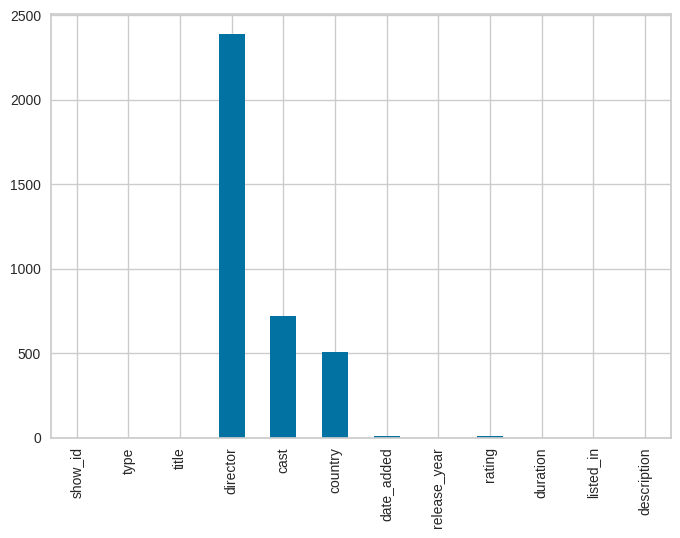

In [14]:
# Visualizing the missing values
df.isnull().sum().plot.bar()
plt.show()

### What did you know about your dataset?

The dataset contains 7787 rows and 12 columns. Netflix shows is classified as "tv shows," "movie shows,".

 we have unique show_ids like "s1, "s2," and so on which represents unique ids of the show. We have title of the show, such as "Rich in Love,etc" as well as its director and cast, which refers to the show diretors and actors that played the show's characters.

 There are 681 nations from which netflix sourced content. The date column states that when movie was added to Netflix, when the year it was released, and its rating are all listed. With 419 different sorts of listed shows (including foreign TV shows, romantic comedies, thrillers, and more), 216 unique values total, including descriptions of both shows and 216 different types of durations in a single season, number of minutes.

 There are no missing values in this dataset and the null values are as follow
 * director        2389
 * cast             718
 * country          507
 * date_added        10
 * rating             7

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns

print(f'there are { df.shape[1]} columns and they are as follow {df.columns}')

there are 12 columns and they are as follow Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [18]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

This dataset has total 7787 rows and 12 columns:

The columns description as follow:
1. Show_id : show ID

2. type : Type of the show like movie or TV show

3. title : Title of the show

4. director : Director of the show

5. cast : Actors and actress of the show

6. country : Country of the origin of the show

7. date_added : Date when the show added to netflix

8. release_year : Release year

9. rating : rating

10. duration : duration of the show

11. listed_in : Listed in

12. description : Description of the show

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.
# Write your code to make your dataset analysis ready
# Netflix Wrangling Class for data wrangling
class NetflixWrangling:
    # Init function
    def __init__(self,df):
      ''' init method '''
      try:
          self.df = df.copy()
          self.df['duration_value'] = self.df['duration'].apply(self.set_duration_value)
          self.df['duration_unit'] = self.df['duration'].apply(self.set_duration_unit)
          self.cast_ = self.get_cast_or_listed_in('cast')
          self.genres_ = self.get_cast_or_listed_in('listed_in')
          self.directors_ = self.getTopValues('director')
          self.countries_ = self.getTopValues('country')
          self.release_years_ = self.getTopValues('release_year')
          self.ratings_ = self.getTopValues('rating')
          self.df['duration_value'] = self.df['duration_value'].apply(lambda x:int(x))

      except:
          print('Invalid input!')
    # Function to get dataset
    def get_df(self):
      ''' Function returns dataframe '''
      return self.df
    # Function to get movies dataset
    def getMovies(self):
      ''' Function returns returns dataframe which contains data of movies '''
      return self.df[self.df['type'] == 'Movie']
    # Function to get TV Show's dataset
    def getTvShows(self):
      ''' Function returns dataframe which contains data of tv shows '''
      return self.df[self.df['type'] == 'TV Show']
    # Function to get top values
    def getTopValues(self,col):
      ''' Function returns top values for the given column '''
      try:
          return self.df[col].value_counts().sort_values(ascending=False)
      except:
          return 'You have entered invalid column!'
    # Function to set duration value
    def set_duration_value(self,string):
      ''' Function for setting duration values '''
      if string[-7:] == 'Seasons':
        return string[:-8]
      elif string[-6:] == 'Season':
        return string[:-7]
      else:
        return string[:-4]

    # Function to set duration unit
    def set_duration_unit(self,duration):
      ''' function for setting duration unit. '''
      if (duration[-7:] == 'Seasons') | (duration[-6:] == 'Season'):
        return 'season'
      else:
        return 'min'

    # Function to get cast or genres
    def get_cast_or_listed_in(self,col):
        df = self.df.copy()
        # internal function 1
        def __get_list():
            '''
            takes dataset and column's name, returns list.
            '''
            list_1=[]
            for i in df[df[col].isna()== False][col]:
                list_1.append(i.split(', '))
            return list_1
          # internal function 2
        def __get_list_vars(list_1):
            list_2 = []
            for i in list_1:
              for j in i:
                list_2.append(j)
            return list_2

          # internal function 3
        def __get_dict_vars(list_2):
            unique_var = set(list_2)
            dict_of_vars = dict()
            for i in unique_var:
              dict_of_vars[i] = list_2.count(i)
            return dict_of_vars
        # Assigning values in list 1 and list 2 then returning the series
        list_1 = __get_list()
        list_2 = __get_list_vars(list_1)
        return pd.Series(__get_dict_vars(list_2)).sort_values(ascending=False)

    # Function for converting duration_value into int type
    def convertInt(self,col):
      ''' Function to convert other type into integer '''
      return int(col)

    # Get showsPerMonth
    def getShowsPerMonth(self,typ='all'):
      ''' Function which returns Shows per month '''
      df = pd.DataFrame()
      if typ == 'tv':
          df = self.getTvShows()
      elif typ == 'movie':
          df = self.getMovies()
      else:
          df = self.df.copy()
      df = df[df['date_added'].isna() == False]
      df['added_month'] = df['date_added'].apply(lambda x:x.split()[0])
      monthly_shows = df['added_month'].value_counts()
      return monthly_shows

    # Get Text Length
    def getTextLength(self,text):
      return len(text)
    # Get Dataframe with length column
    def getDfWithLength(self,col):
      df = self.df.copy()
      df['text_length'] = df[col].apply(self.getTextLength)
      return df

# Initializing the object
netflixWrangling = NetflixWrangling(df)

In [23]:
df["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [24]:
# top count of show from top ten country
df["country"].value_counts().head(10)

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

In [25]:
# Printing the shapes for each type of shows
print('Data for Movies has shape :',netflixWrangling.getMovies().shape)
print('')
print('Data for TV shows has shape :',netflixWrangling.getTvShows().shape)
print('')

Data for Movies has shape : (5377, 14)

Data for TV shows has shape : (2410, 14)



In [26]:
# Total length for each type of durations
netflixWrangling.get_df().groupby(['duration_unit'])['duration_value'].sum()

duration_unit
min       533979
season      4280
Name: duration_value, dtype: int64

In [27]:
# Total number of Shows for each month
print('Total number of Shows for each month')
netflixWrangling.getShowsPerMonth()

Total number of Shows for each month


December     833
October      785
January      757
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: added_month, dtype: int64

In [28]:
# Total number of Movies for each month
print('Total number of Movies for each month')
netflixWrangling.getShowsPerMonth('movie')

Total number of Movies for each month


January      560
December     554
October      553
November     511
March        471
April        420
September    415
August       414
July         403
June         377
May          371
February     328
Name: added_month, dtype: int64

In [29]:
# Total number of TV Shows for each month
print('Total number of TV Shows for each month')
netflixWrangling.getShowsPerMonth('tv')

Total number of TV Shows for each month


December     279
October      232
November     227
August       204
September    204
March        198
July         197
January      197
April        181
May          172
June         165
February     144
Name: added_month, dtype: int64

In [30]:
# Assigning top 5 actors and genres to a variable
print('Top 5 actors with highest number of shows :')
netflixWrangling.cast_.head()

Top 5 actors with highest number of shows :


Anupam Kher         42
Shah Rukh Khan      35
Om Puri             30
Naseeruddin Shah    30
Takahiro Sakurai    29
dtype: int64

In [31]:
# Top 5 directors with highest number of shows
print('Top 5 directors with highest number of shows :')
netflixWrangling.directors_.head()

Top 5 directors with highest number of shows :


Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Name: director, dtype: int64

In [32]:
# Top 5 countries with highest number of shows
print('Top 5 countries with highest number of shows :')
netflixWrangling.countries_.head()

Top 5 countries with highest number of shows :


United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64

In [33]:
# Top 5 years with highest number of shows released
print('Top 5 years with highest number of shows released:')
netflixWrangling.release_years_.head()

Top 5 years with highest number of shows released:


2018    1121
2017    1012
2019     996
2016     882
2020     868
Name: release_year, dtype: int64

In [34]:
# Top ratings with highest number of shows
print('Top ratings with highest number of shows :')
netflixWrangling.ratings_

Top ratings with highest number of shows :


TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [35]:
# Top 5 Genres with highest number of Movies/TV Shows
print('Top 5 Genres with highest number of Movies/TV Shows')
netflixWrangling.genres_.head()

Top 5 Genres with highest number of Movies/TV Shows


International Movies      2437
Dramas                    2106
Comedies                  1471
International TV Shows    1199
Documentaries              786
dtype: int64

In [36]:
# Top 10 directors with highest length of descriptions
print('Top 10 Directors with highest length of descriptions')
netflixWrangling.getDfWithLength('description').groupby('director')['text_length'].mean().sort_values(ascending=False).reset_index().head(10)

Top 10 Directors with highest length of descriptions


,director,text_length
0,Chia Tang,246.0
1,Gene Quintano,244.0
2,Chris Koch,243.0
3,N. Chandra,241.0
4,Daniel Lee,240.0
5,Kevin Reynolds,239.0
6,Jeffrey W. Byrd,231.0
7,Marek Kanievska,230.0
8,Shawn Arranha,221.0
9,Esteban Sapir,220.0


### What all manipulations have you done and insights you found?

1. First of I assigned all movies' data to a variable and TV shows' data to another variable and made a class which is responsible of extracting data from string and also made 2 functions for getting duration values and units.


2. Directors with highest number of movies/tv shows are Raúl Campos and Jan Suter : 18

3. Top 5 countries produced highest number of movies are :

United States : 2555
India : 923
United Kingdom : 397
Japan : 226
South Korea : 183


4. Highest movies produced in year 2018 : 1121

5. Rating for highest number of movie is TV-MA : 2863

6. Top 5 actors with highest number of movies are :


Anupam Kher : 42
Shah Rukh Khan : 35
Naseeruddin Shah : 30
Om Puri : 30
Akshay Kumar : 29


7. Top genres with highest number of movies are :

International Movies : 2437
Dramas : 2106


8. Total Seasons : 4280 and Total Minutes : 533979.

9. Number of TV Shows/Movies for each month

December : 833

October : 785

January : 757

November : 738

March : 669

September : 619

August : 618

April : 601

July : 600

May : 543

June : 542

February : 472

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [37]:
# Class for visualization
class NetflixVisualization(NetflixWrangling):
    bar_colors = ['violet','indigo','blue','g','yellow','orange','r']
    # Init method
    def __init__(self,df):
      ''' Init method '''
      self.df = df
      self.df_tv = df[df['type'] == 'Tv_shows']

    # Bar chart for value counts
    def countBar(self,col,typ='default',top=10):
      ''' Function to display top most values for a given column'''
      try:
        if typ == 'tv':
          df = self.getTvShows()
        elif typ == 'movie':
          df = self.getMovies()
        else:
          df = self.df.copy()
        df[col].value_counts().sort_values(ascending=False)[:top].plot.bar(color=self.bar_colors,figsize=(15,5))
        plt.title('Number of shows for top '+str(top)+" "+col)
        plt.xlabel(col)
        plt.ylabel('counts')
        plt.show()
      except:
        print('Invalid Input...')

    # Barh chart for value counts
    def countBarh(self,col,typ='default',top=10):
      ''' Function to display top most values for a given column '''
      try:
        if typ == 'tv':
          df = self.getTvShows()
        elif typ == 'movie':
          df = self.getMovies()
        else:
          df = self.df.copy()
        df[col].value_counts().sort_values(ascending=False)[:top].plot.barh(color=self.bar_colors,figsize=(13,5))
        plt.title('Number of shows for top '+str(top)+" "+col)
        plt.xlabel('counts')
        plt.ylabel(col)
        plt.show()
      except:
        print('Invalid Input...')

    # Chart 1 - Function shows contents counts for each type
    def chart_1(self):
      ''' Function shows contents counts for each type  '''
      self.df['type'].value_counts().plot.pie(figsize=(7,7),
                                                  colors={'cyan','coral'},
                                                  shadow=True,explode=[0.03,0.03],
                                                  autopct='%0.01f%%')
      plt.show()

    # Chart 2 - Bar chart shows top countries with highest number of shows
    def chart_2(self,typ='default',top=10):
      ''' Function shows top countries with highest number of shows '''
      self.countBar('country',typ,top)


    # Chart 3 - Bar chart,directors for TV shows
    def chart_3(self,typ='default',top=10):
      ''' Function shows top directors with highest number of shows '''
      self.countBar('director',typ,top)


    # chart 4 - Function shows top release with highest number of shows
    def chart_4(self,typ='default',top=10):
      ''' Function shows top release year with highest number of shows '''
      self.countBar('release_year',typ,top)

     # Chart 5 - shows top ratings with highest number of shows
    def chart_5(self,typ='default',top=10):
      ''' Function shows top ratings with highest number of shows '''
      if typ == 'movie':
        plt.xticks(np.arange(0,1851,100))
        self.countBarh('rating',typ,top)
      else:
        plt.yticks(np.arange(0,1201,100))
        self.countBar('rating',typ,top)


    # Chart 6- shows top listed in with highest number of shows
    def chart_6(self,typ='default',top=10):
      ''' Function shows top listed_in with highest number of shows '''
      plt.xticks(np.arange(0,400,10))
      self.countBarh('listed_in',typ,top)
    # Method to get top  values for the given column
    def getTopBarh(self,col):
      ''' Function shows top 5 values for a given column '''
      x = self.get_cast_or_listed_in(col).head()
      x.plot.barh(color= self.bar_colors)
      plt.title('Top 5 '+col)
      plt.xlabel('count of movies/tv shows')
      plt.ylabel(col)
      plt.show()

# Initializing the object
netflixVisualization = NetflixVisualization(df)

#### Chart - 1

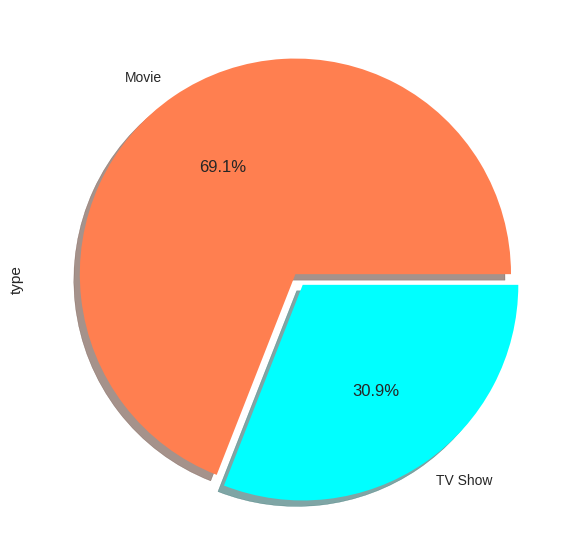

In [38]:
# Chart - 1 visualization code
# Chart - 1 visualization code
# value counts for each type
netflixVisualization.chart_1()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

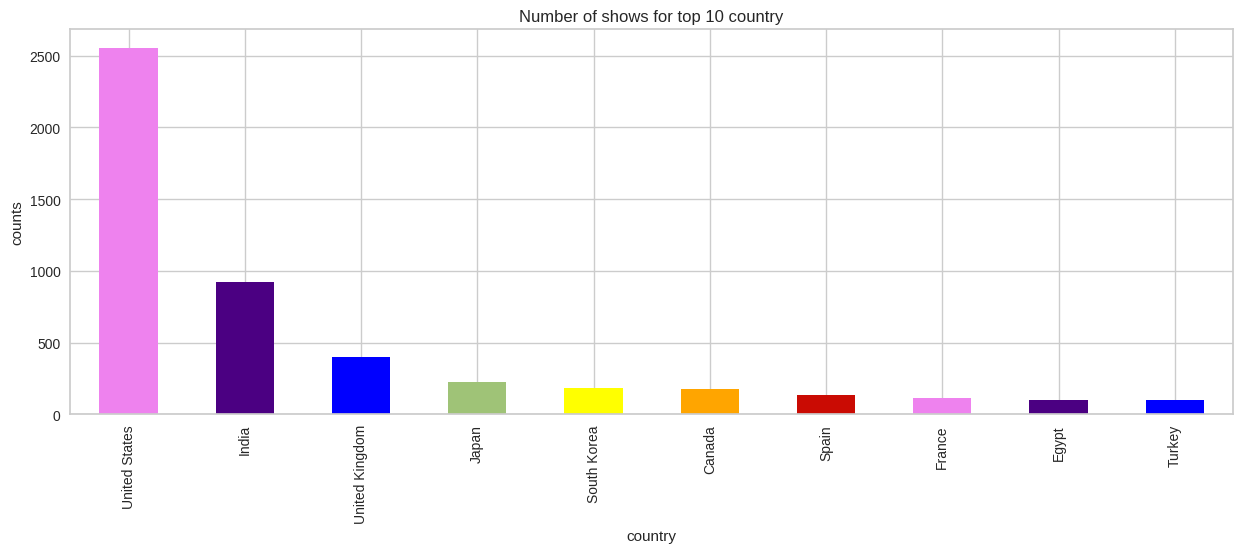

In [39]:
# Chart - 2 visualization code
#Top 10 countries with highest number of shows
netflixVisualization.chart_2()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

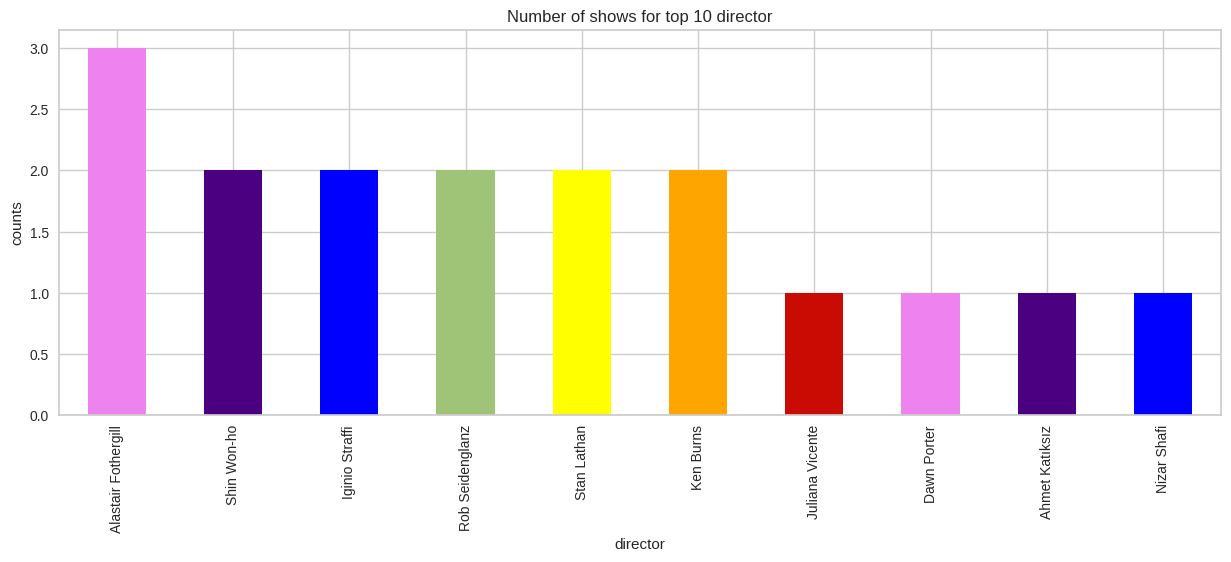

In [40]:
# Chart - 3 visualization code
#Top 10 directors with highest number of TV shows
netflixVisualization.chart_3('tv')

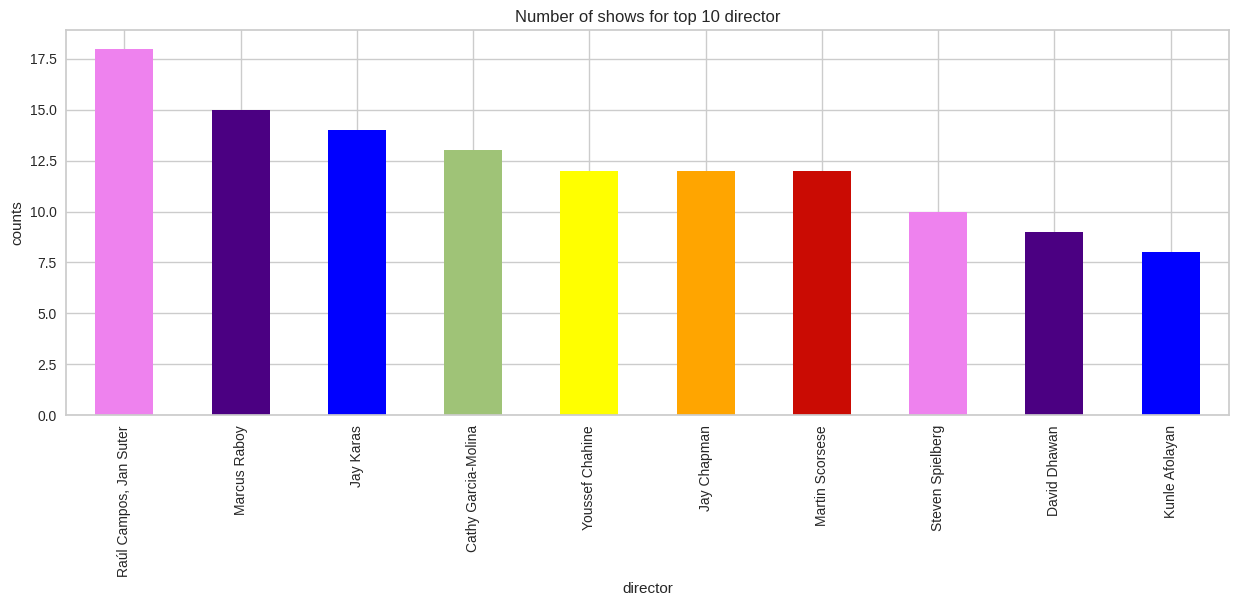

In [41]:
# Top 10 directors with highest number of Movies
netflixVisualization.chart_3('movie')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

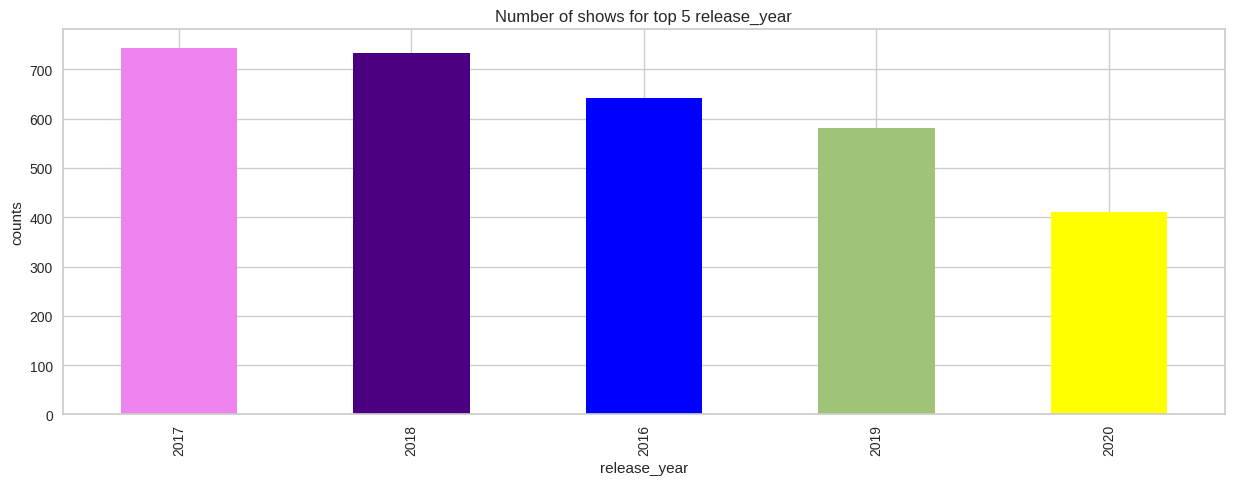

In [42]:
# Chart - 4 visualization code
#Top 5 release year with highest number of Movies
netflixVisualization.chart_4('movie',top=5)

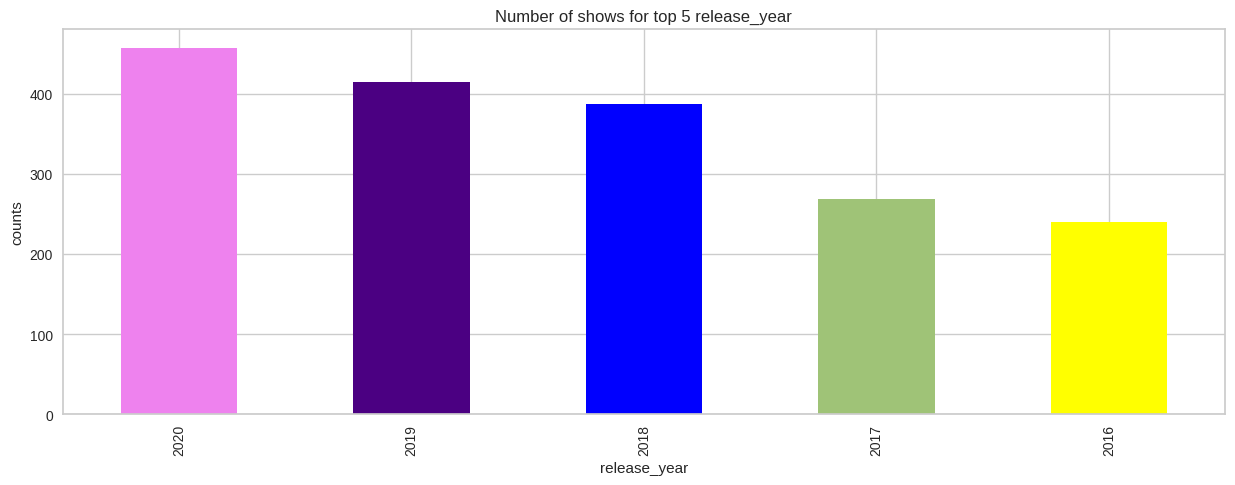

In [43]:
#Top 5 release year with highest number of TV shows
netflixVisualization.chart_4('tv',top=5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

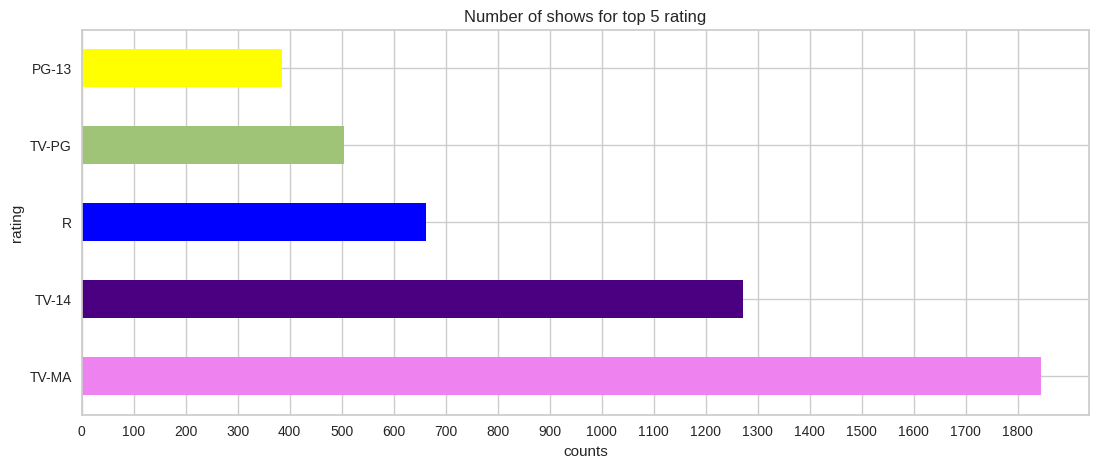

In [44]:
# Chart - 5 visualization code
#Top 5 rating with highest number of Movies
netflixVisualization.chart_5('movie',top=5)

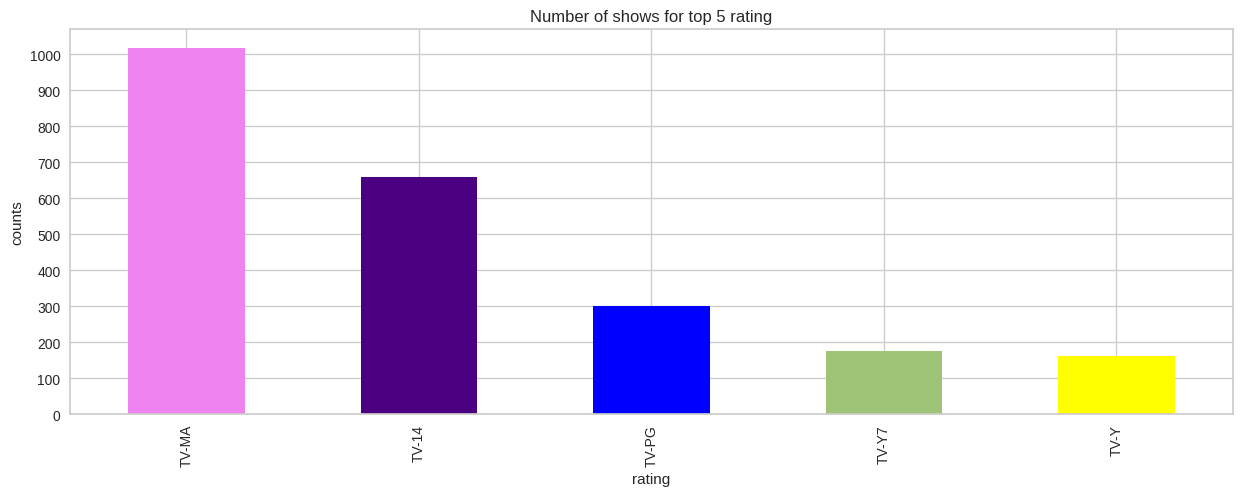

In [45]:
# Top 5 rating with highest number of TV Shows
netflixVisualization.chart_5('tv',top=5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

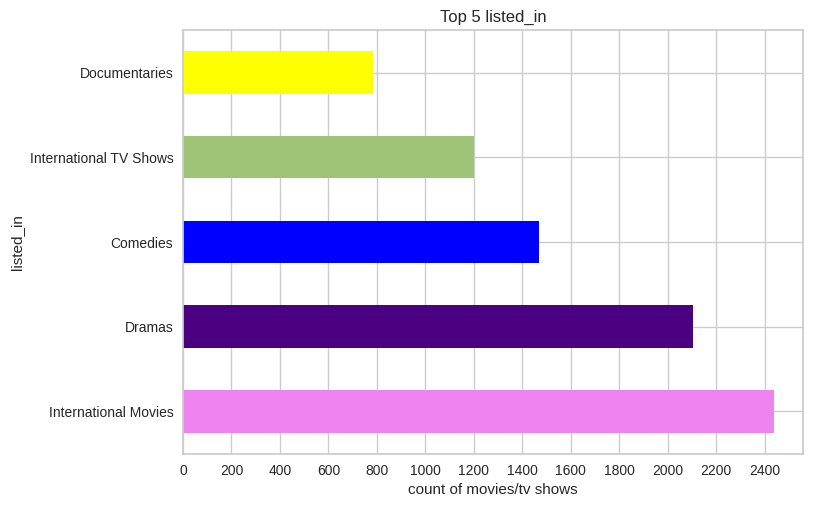

In [46]:
# Chart - 6 visualization code
#Top 5 genres with highest number of shows
plt.xticks(np.arange(0,2601,200))
netflixVisualization.getTopBarh('listed_in')

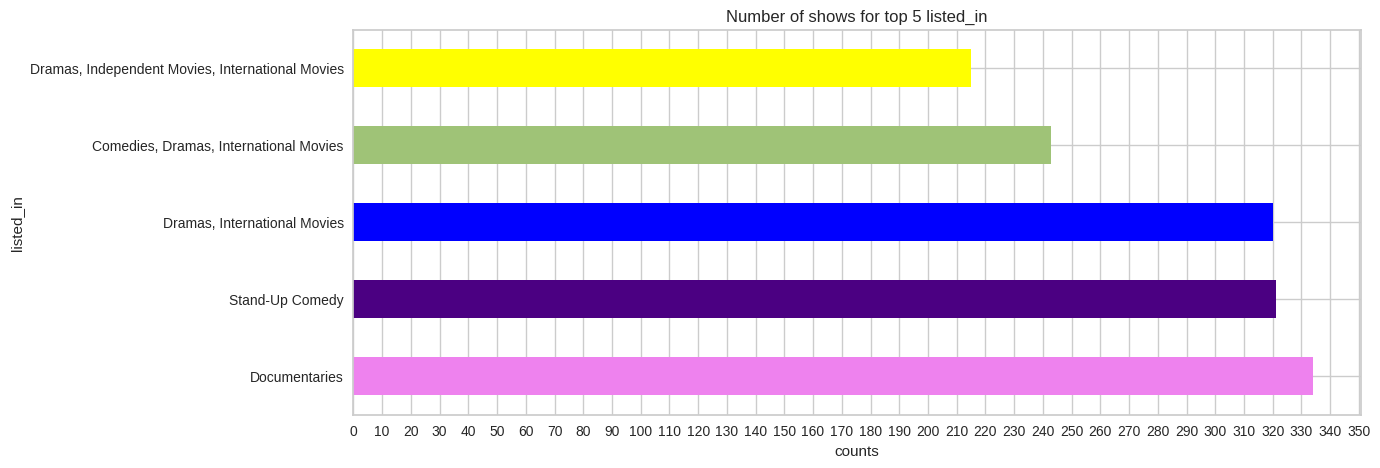

In [47]:
#Top 5 Listed_in with highest number of Movies
netflixVisualization.chart_6('movie',top=5)

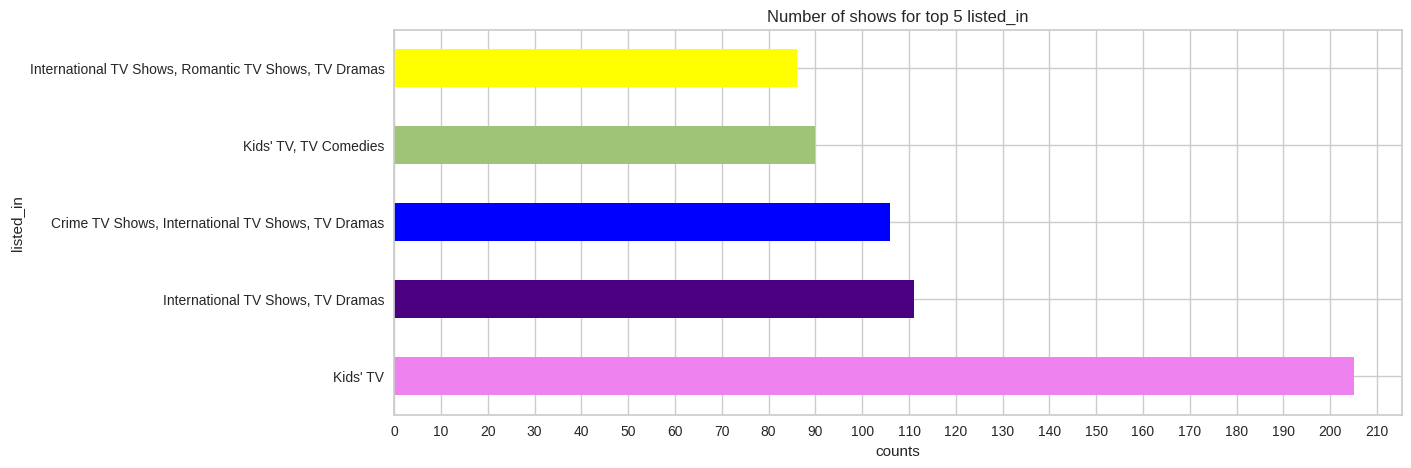

In [48]:
# Top 5 Listed_in with highest number of TV shows
netflixVisualization.chart_6('tv',top=5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

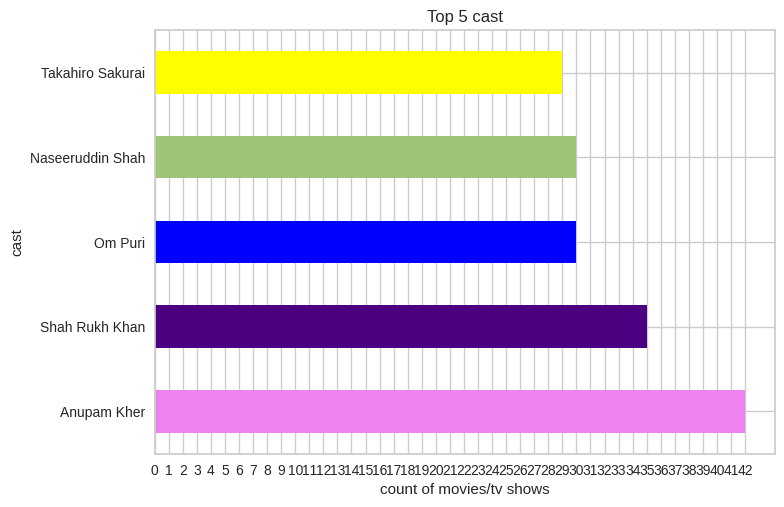

In [49]:
# Chart - 7 visualization code
#Top 5 Actors with highest number of shows
plt.xticks(np.arange(0,43,1))
netflixVisualization.getTopBarh('cast')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

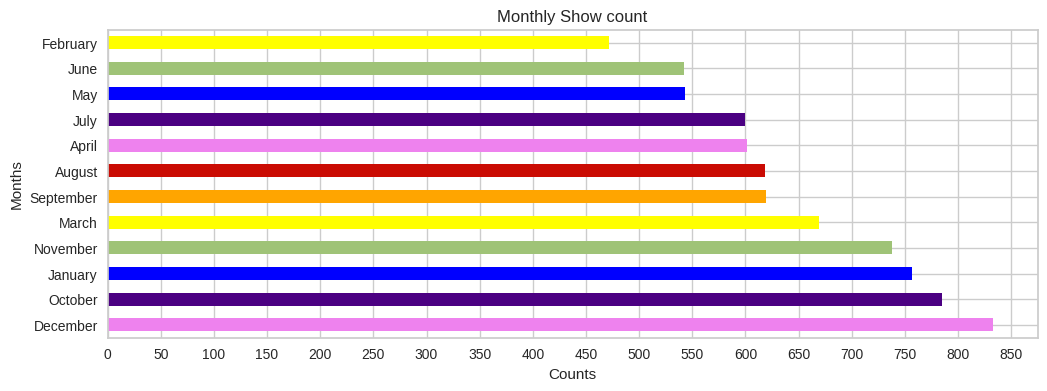

In [50]:
# Chart - 8 visualization code
netflixWrangling.getShowsPerMonth().plot.barh(figsize=(12,4),color=netflixVisualization.bar_colors)
plt.title('Monthly Show count')
plt.xlabel('Counts')
plt.ylabel('Months')
plt.xticks(np.arange(0,851,50))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***